### 改變總整理
1. 調低batch size(128>>64)
2. 增加epochs(12>>20)
3. 更換loss函數(mse>>categorical_crossentropy)
4. 發現更換loss函數後正確率顯著提升(80%>>90%)

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(60000,28,28,1) / 255
x_test = x_test.reshape(10000,28,28,1) / 255

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(16, (3,3), padding='same', 
                     input_shape=(28,28,1),
                     activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Conv2D(64, (3,3), padding='same', 
                activation='relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(20, activation='relu'))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, batch_size=64, epochs=20)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 38s 625us/sample - loss: 0.2162 - accuracy: 0.9204
Epoch 2/10
60000/60000 [==============================] - 35s 591us/sample - loss: 0.2081 - accuracy: 0.9237
Epoch 3/10
60000/60000 [==============================] - 35s 588us/sample - loss: 0.2004 - accuracy: 0.9261
Epoch 4/10
60000/60000 [==============================] - 38s 625us/sample - loss: 0.1929 - accuracy: 0.9294
Epoch 5/10
60000/60000 [==============================] - 38s 635us/sample - loss: 0.1884 - accuracy: 0.9312
Epoch 6/10
60000/60000 [==============================] - 38s 636us/sample - loss: 0.1811 - accuracy: 0.9327
Epoch 7/10
60000/60000 [==============================] - 38s 632us/sample - loss: 0.1762 - accuracy: 0.9361
Epoch 8/10
60000/60000 [==============================] - 38s 630us/sample - loss: 0.1703 - accuracy: 0.9371
Epoch 9/10
60000/60000 [==============================] - 38s 634us/sample - loss: 0.1656 - accuracy: 0.9

In [30]:
result = model.predict_classes(x_test)

In [31]:
def my_predict(n):
    print('The model predict',class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

The model predict Dress


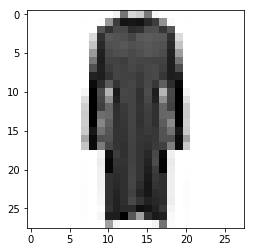

In [32]:
my_predict(67)

In [33]:
from ipywidgets import interact_manual

In [34]:
interact_manual(my_predict, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [35]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 295us/sample - loss: 0.2710 - accuracy: 0.9049


In [36]:
loss, acc = score

In [37]:
print('The true test rate is', acc )

The true test rate is 0.9049
